<a href="https://colab.research.google.com/github/ANANTHIGAML/Property-Hazard-Assessment/blob/main/Property_Hazard_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 37.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=7815e76977c1dd30256b89a2a584d09168280e6118560d2066799070a67d6b53
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
!pip install pydantic-settings

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Hazard_Dataset.csv')
df.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,83642,2,10,23,4,N,K,Y,B,D,...,2,37,1,11,2,Y,N,E,2,1
1,92530,6,3,18,2,B,H,N,B,B,...,2,34,1,12,7,Y,N,C,3,3
2,86131,4,5,20,4,B,K,N,B,B,...,1,40,1,17,4,Y,N,D,1,1
3,88666,1,4,7,5,N,H,N,B,B,...,2,37,1,11,6,Y,N,D,2,1
4,11122,21,10,21,6,N,C,Y,B,C,...,2,40,1,6,6,N,N,D,5,5


In [6]:
print(df.shape)

(40799, 34)


In [7]:
cols = df.columns
predictors = df[cols[2:]]
target = df['Hazard']

In [8]:
df.describe()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
count,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000
mean,50850.454276,4.009584,9.723645,12.849359,3.190691,7.025123,14.009902,1.582416,57.568641,12.410451,10.251403,1.947499,33.504620,1.031349,12.496973,4.489963,2.448344,3.482512
std,29282.641037,4.007785,5.170715,6.257502,1.742044,3.596619,4.649012,0.865121,23.461468,4.785406,4.845443,0.795249,5.830512,0.191676,7.313552,1.899386,1.257293,3.070911
min,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25596.500000,1.000000,6.000000,7.000000,2.000000,3.000000,10.000000,1.000000,40.000000,9.000000,6.000000,2.000000,31.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,50784.000000,3.000000,9.000000,14.000000,3.000000,8.000000,15.000000,1.000000,55.000000,11.000000,10.000000,2.000000,34.000000,1.000000,14.000000,4.000000,2.000000,2.000000
75%,76198.500000,5.000000,14.000000,18.000000,4.000000,12.000000,20.000000,2.000000,77.000000,15.000000,14.000000,2.000000,40.000000,1.000000,18.000000,6.000000,3.000000,5.000000
max,101999.000000,69.000000,19.000000,24.000000,9.000000,12.000000,20.000000,4.000000,100.000000,39.000000,22.000000,7.000000,40.000000,3.000000,25.000000,7.000000,7.000000,12.000000


In [9]:
objcol= df.select_dtypes(['object']).columns
objcol

Index(['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11',
       'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
       'T2_V12', 'T2_V13'],
      dtype='object')

In [10]:
cutoff = df.shape[0] * 0.05
print("cutoff : ", cutoff)

cutoff :  2039.95


In [11]:
for col in objcol:
    freqs=df[col].value_counts()
    selected_cats=freqs.index[freqs > cutoff]

    print(col)
    for cat in selected_cats:
        name=col+'_'+cat

        df[name]=(df[col]==cat).astype(int)
    del df[col]

T1_V4
T1_V5
T1_V6
T1_V7
T1_V8
T1_V9
T1_V11
T1_V12
T1_V15
T1_V16
T1_V17
T2_V3
T2_V5
T2_V11
T2_V12
T2_V13


In [12]:
df.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,...,T2_V5_B,T2_V5_C,T2_V11_Y,T2_V11_N,T2_V12_N,T2_V12_Y,T2_V13_E,T2_V13_A,T2_V13_C,T2_V13_D
0,83642,2,10,23,4,2,10,0,52,14,...,0,1,1,0,1,0,1,0,0,0
1,92530,6,3,18,2,8,10,3,39,14,...,0,0,1,0,1,0,0,0,1,0
2,86131,4,5,20,4,7,15,1,66,10,...,0,1,1,0,1,0,0,0,0,1
3,88666,1,4,7,5,8,15,3,48,11,...,1,0,1,0,1,0,0,0,0,1
4,11122,21,10,21,6,12,10,1,42,11,...,0,0,0,1,1,0,0,0,0,1


In [13]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [14]:
X = df[df.columns[2:]]
Y=pd.DataFrame()
Y['Hazard'] = df['Hazard']

In [15]:
Y.columns

Index(['Hazard'], dtype='object')

In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split

In [17]:
import numpy as np
lambdas=np.linspace(1,100,100)
lm=Ridge(fit_intercept=True)
params= {
    'alpha':lambdas
}
ridgesearch=GridSearchCV(lm , param_grid=params , cv=10 ,n_jobs=-1,  scoring='neg_mean_absolute_error' ,  verbose=30)
ridgesearch.fit(X,Y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error', verbose=30)

In [18]:
ridgesearch.best_estimator_

Ridge(alpha=100.0)

In [19]:
report(ridgesearch.cv_results_,5)

Model with rank: 1
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 100.0}

Model with rank: 2
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 99.0}

Model with rank: 3
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 98.0}

Model with rank: 4
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 97.0}

Model with rank: 5
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 96.0}



In [20]:
X.shape

(40799, 61)

In [21]:
Y.shape

(40799, 1)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
def predplotter(searchobj):
  cur_model = searchobj#.best_estimator_
  cur_model.fit(x_train, y_train)
  preds = cur_model.predict(x_test)
  plt.figure(figsize=(12, 6))
  plt.plot(x_test['T2_V1'], y_test, 'o')           # scatter plot showing actual data
  plt.plot(x_test['T2_V1'],preds , 'r', linewidth=2)   # regression line
  plt.xlabel('T2V1')
  plt.ylabel('predictions')
  plt.title('T2v1 vs predictions')
  plt.show()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


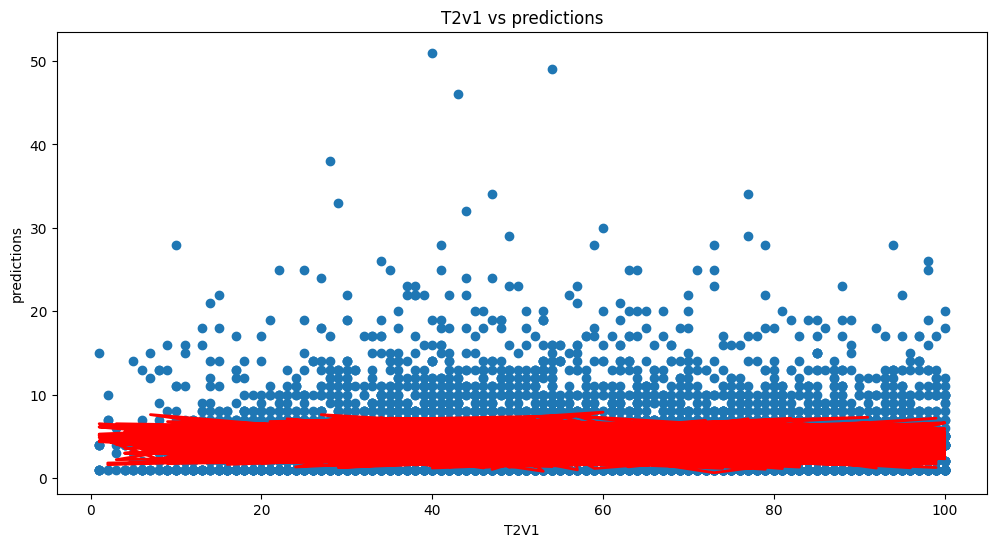

In [23]:
predplotter(ridgesearch)


In [24]:
dtreg = DecisionTreeRegressor(criterion='absolute_error')

params ={'max_depth':[None,5,7,10,12,15],
            'min_samples_leaf':[5,10,30,50,100],
            'min_samples_split':[2,5,10,15,20,50,70,100]}

dtree = RandomizedSearchCV(param_distributions = params, estimator = dtreg, cv =5,n_iter=10, verbose = 30,n_jobs=-1, scoring='neg_mean_absolute_error')

In [ ]:
dtree.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
dtree.best_estimator_

In [ ]:
report(dtree.cv_results_,5)

In [ ]:
predplotter(dtree)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
data = pd.read_csv('') # Replace 'your_data.csv' with your actual file
X = data.drop('target_variable', axis=1) # Replace 'target_variable' with the name of your target column
Y = data['target_variable']

rfreg = RandomForestRegressor(criterion='mae', verbose=30, n_estimators=100, n_jobs=-1)

params = {
    "n_estimators": [500],
    "max_depth": [5, 10, 15],
    "min_samples_leaf": [5, 10, 30, 50, 100],
    "min_samples_split": [2, 5, 10, 15, 20, 50, 70, 100]
}
rftree = RandomizedSearchCV(param_distributions=params, estimator=rfreg, cv=5, n_iter=10, verbose=30, scoring='neg_mean_absolute_error')
rftree.fit(X, Y)



In [ ]:
dir(rfreg)
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

param_tuning = {
        #'learning_rate': [0.01, 0.05,0.1,0.25, 0.5, 0.7],
        #'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250, 500,750,1000],
        'objective': ['count:poisson']}

xgbsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch.fit(X,Y)
print(xgbsearch.best_params_)
print(report(xgbsearch.cv_results_,5))
predplotter(xgbsearch)

In [ ]:
param_tuning = {
        'learning_rate': [0.01, 0.05,0.1,0.25, 0.5, 0.7],
        #'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250],
        'objective': ['count:poisson']}

xgbsearch2 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch2.fit(X,Y)
print(xgbsearch2.best_params_)
print(report(xgbsearch2.cv_results_,5))
predplotter(xgbsearch2)

In [ ]:
param_tuning = {
        'learning_rate': [0.001,0.002, 0.005,0.007,0.01,0.02],
        #'max_depth':  [3, 5, 7, 10,12,15],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250,500],
        'objective': ['count:poisson']}

xgbsearch3 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch3.fit(X,Y)
print(xgbsearch3.best_params_)
print(report(xgbsearch3.cv_results_,5))
predplotter(xgbsearch3)

In [ ]:
param_tuning = {
        'learning_rate': [0.002, 0.005],
        'max_depth':  [3, 5, 7, 10,12,15],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

In [ ]:
param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 5,10,15,50,100,150,200],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

In [ ]:

param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 15,30,50],
        'subsample': [0.1,0.2,0.5, 0.7,0.9],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

In [ ]:


param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 15],
        'subsample': [0.7],
        'colsample_bytree': [0.1,0.2,0.5, 0.7,0.9],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)